In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import datetime as dt
from datetime import datetime
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d
from scipy.signal import find_peaks
from matplotlib.ticker import MultipleLocator
from pynverse import inversefunc
from matplotlib import rcParams

In [2]:
# rcParams.update({'font.size': 24})

## Importing RGA Data

In [3]:
def GetRGA(directory):
    'Given the date of the h5 file (yyyymmdd), extracts the rga scan data from the file and returns the partial pressures, amu, and timestamps'
    file = 'C:/Data/{}/RGAScan.h5'.format(directory)
    rga_scans = np.array(pd.read_hdf(file, key='rga/rga'))
    rga_timestamps = np.array(pd.read_hdf(file, key='rga/timestamp'))
    amu = np.arange(1,200.01,0.1)
    delta_t = np.array([datetime.strptime(x, '%Y%m%d%H%M%S') for x in rga_timestamps])

    return rga_scans, amu, delta_t

def PlotRGAScan(rga_scans, amu, label1 = 'First Scan', label2='Last Scan', filename='RGAScan.png'):
    plt.figure(figsize=(15,8))
    plt.xlabel('Mass [amu]')
    plt.ylabel('Partial Pressure [Torr]')
    plt.xlim(0,200)
    plt.ylim(1e-10,1e-5)
    total_p = []
    for x in rga_scans: 
        total_p.append(np.sum(x))
        # plt.plot(amu, x, color='k', lw=1)
    plt.plot(amu, rga_scans[0], color='k', alpha=1, label=label1)
    plt.plot(amu, rga_scans[-1], color='r', alpha=1, label=label2)
    plt.legend(loc='upper right')
    # plt.vlines(x=28, ymin=1e-9, ymax=1e-6)
    # plt.vlines(x=32, ymin=1e-9, ymax=1e-6)

    plt.yscale('log')
    plt.savefig(filename)
    plt.show()

def PlotRGAvTime(delta_t, rga_scans, amu, gases = [2,4,18,28,32,40,44], labels = ['Hydrogen', 'Helium', 'Water','Nitrogen','Oxygen','Argon','Carbon Dioxide'], filename='RGAvTime.png'):
    plt.figure(figsize=(12,6))
    # plt.xlim(0,np.max(delta_t/3600.0))
    # plt.ylim(5e-12,1e-7)
    plt.xlabel('Time [h]')
    # plt.xticks(fontsize=20)
    plt.ylabel('Partial Pressure [Torr]')

    for i,gas in enumerate(gases):
        cut = np.where((amu<gas+0.5) & (amu>gas-0.5))
        pp = [np.max(x[cut]) for x in rga_scans]
        plt.plot(delta_t, pp, label=labels[i])

    # plt.fill_betweenx([10e-13, 10e-8], delta_t[0], datetime(2023, 12, 16, 16, 0, 0), color='gray', alpha=0.3)
    # plt.text(datetime(2023, 12, 15, 20, 0, 0), 1e-11, u'T = 20 \N{DEGREE SIGN}C')
    # plt.fill_betweenx([10e-13, 10e-8], datetime(2023, 12, 16, 16, 0, 0), delta_t[-1], color='#1f77b4', alpha=0.3)
    # plt.text(datetime(2023, 12, 16, 17, 0, 0), 1e-11, u'T = -110 \N{DEGREE SIGN}C')
    plt.legend(loc='upper right')
    plt.yscale('log')
    plt.savefig(filename)
    plt.show()

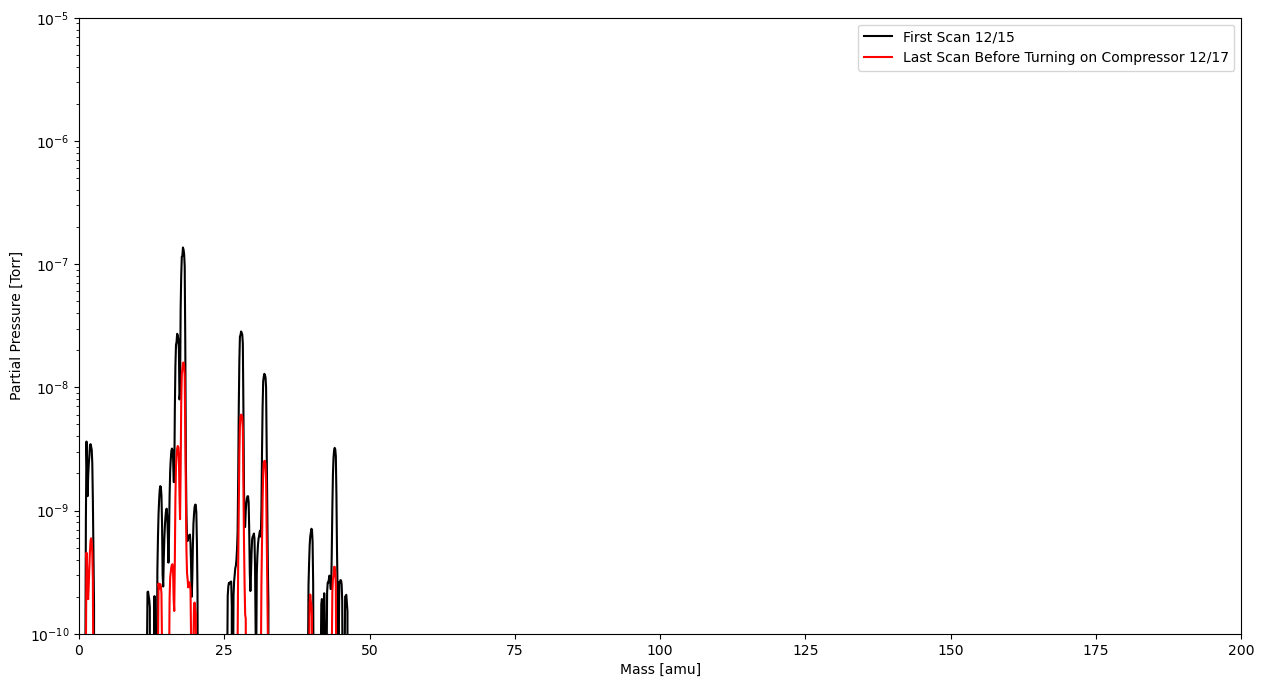

In [6]:
RGA1, AMU1, TIME1 = GetRGA('20231215')
PlotRGAScan(RGA1[:2400], AMU1[:2400], filename='PreCooldownTeflonRGAScan.png', label1='First Scan 12/15', label2='Last Scan Before Turning on Compressor 12/17')

In [10]:
len(TIME1)

3824

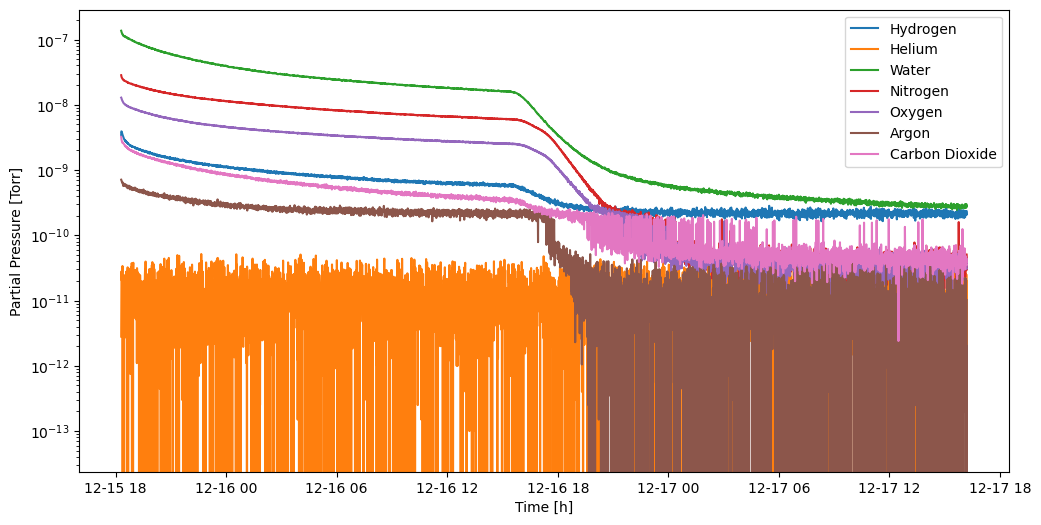

In [5]:
PlotRGAvTime(TIME1, RGA1, AMU1, filename='RGAvTimeTeflonpreLXe.png')

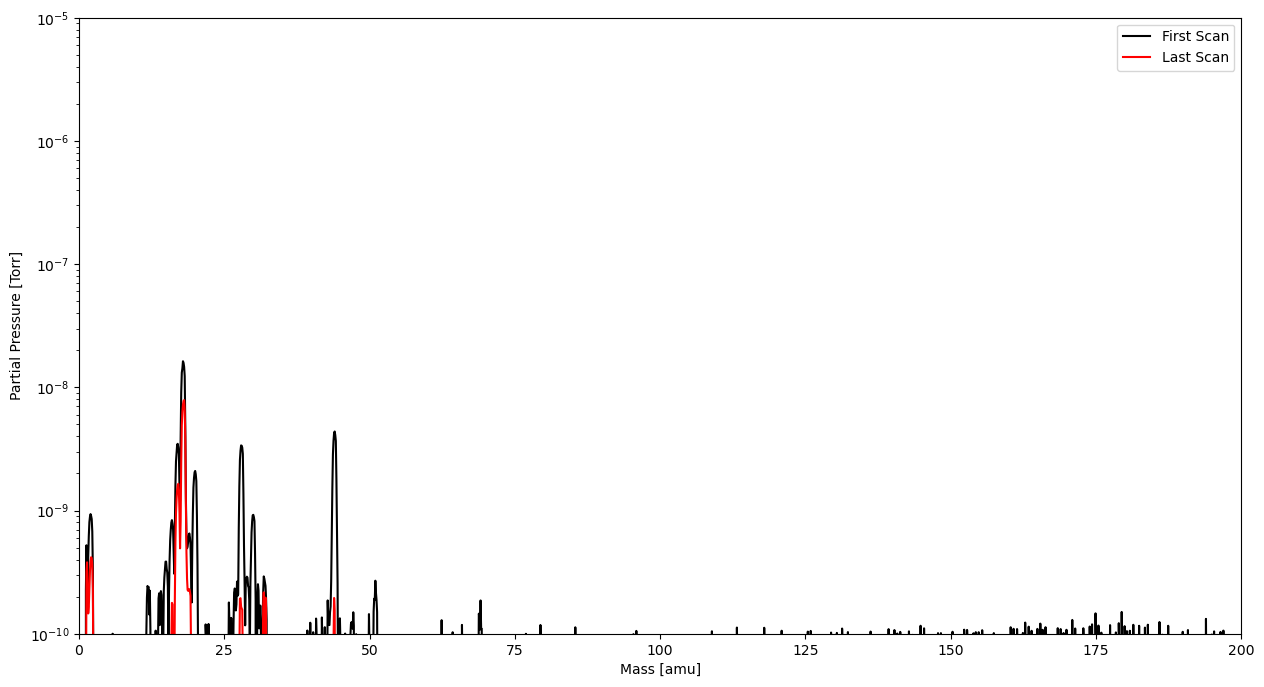

In [5]:
RGA1, AMU1, TIME1 = GetRGA('20240318')
PlotRGAScan(RGA1, AMU1)

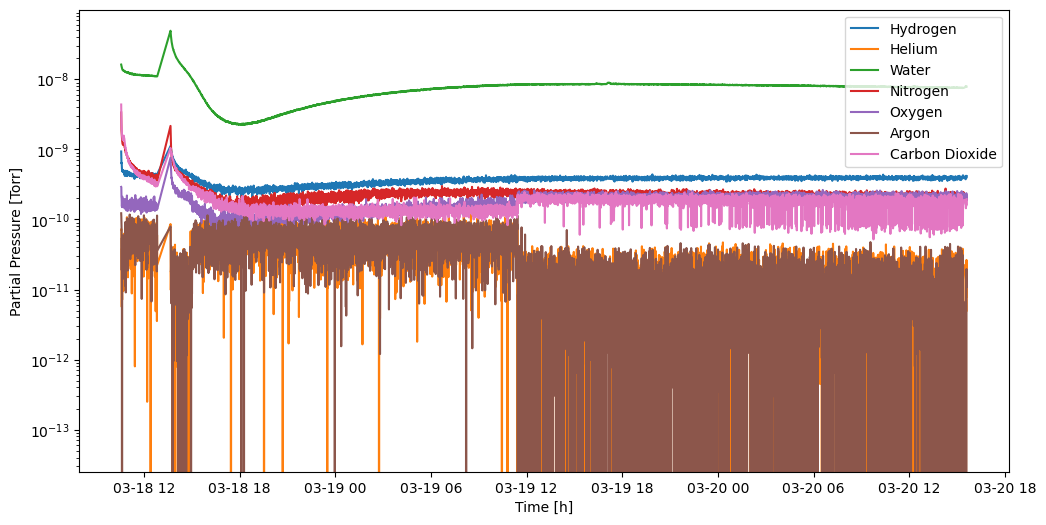

In [6]:
PlotRGAvTime(TIME1, RGA1, AMU1)

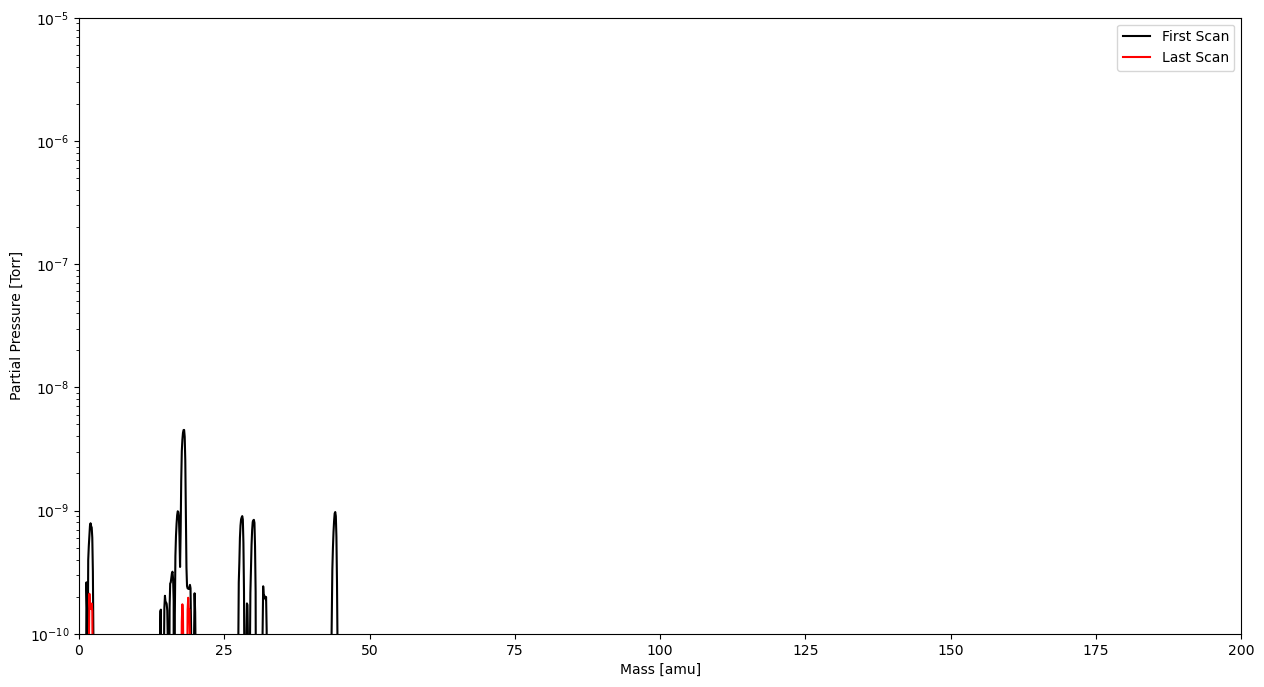

In [7]:
RGA2, AMU2, TIME2 = GetRGA('20240401')
PlotRGAScan(RGA2, AMU2)

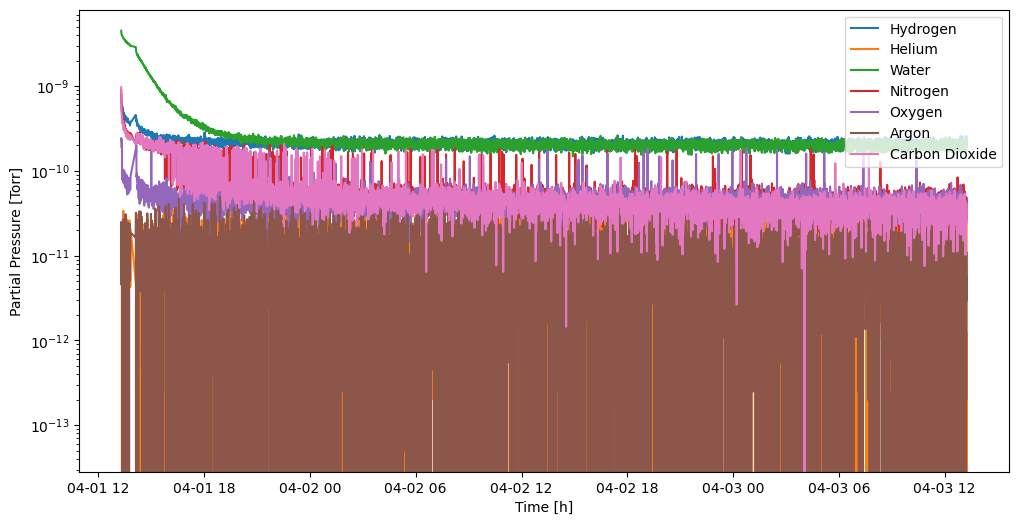

In [8]:
PlotRGAvTime(TIME2, RGA2, AMU2)

In [16]:
rcParams.update({'font.size': 24})

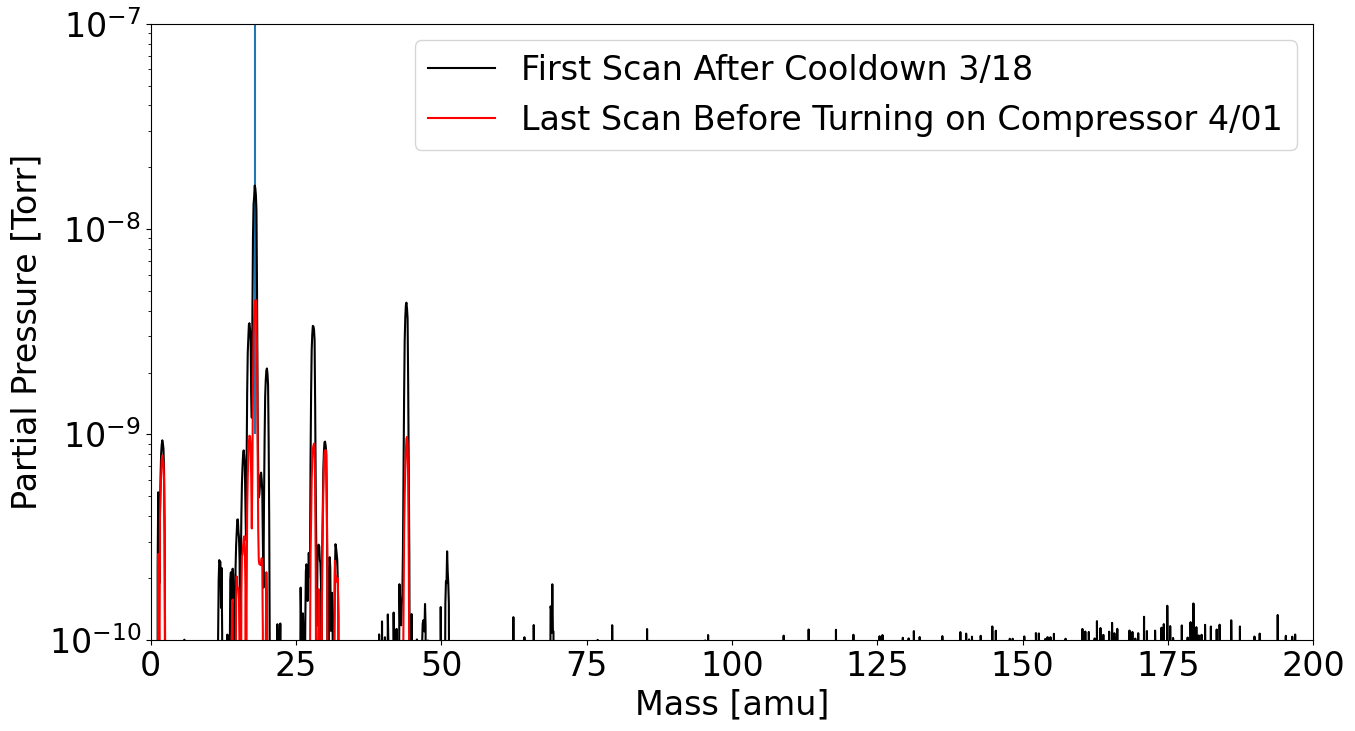

In [17]:
plt.figure(figsize=(15,8))
plt.xlabel('Mass [amu]')
plt.ylabel('Partial Pressure [Torr]')
plt.xlim(0,200)
plt.ylim(1e-10,1e-7)
total_p = []
for x in RGA1: 
    total_p.append(np.sum(x))
    # plt.plot(amu, x, color='k', lw=1)
plt.plot(AMU1, RGA1[0], color='k', alpha=1, label='First Scan After Cooldown 3/18')
plt.plot(AMU2, RGA2[0], color='r', alpha=1, label='Last Scan Before Turning on Compressor 4/01')
plt.legend(loc='upper right')
# plt.vlines(x=28, ymin=1e-9, ymax=1e-6)
# plt.vlines(x=32, ymin=1e-9, ymax=1e-6)
plt.vlines(x=18, ymin=1e-9, ymax=1e-6)

plt.yscale('log')
plt.savefig('EpoxyScansOverTime.png')
plt.show()

In [5]:
import sys
sys.path.insert(0, '../../../purity-monitor/')
sys.path.insert(0, '../../WaveformAnalysis/')
# import Dataset as Dataset
import StandMonitor as Monitor
import PlotFunctions as Plt

In [6]:
Sensors = []
# Files = glob.glob('C:/Data/{}/2023*.h5'.format(Directory))
Files = ['C:/Data/StandStatus/20220117.h5']
for File in Files: 
    Sensor = Monitor.SensorData(Filepath=File)
    Sensor.GetData()
    Sensors.append(Sensor)

AllSensors = Monitor.SensorData()
AllSensors.Combine(Sensors) # edit combine to try to incorporate self.Data

Temperatures = AllSensors.ReturnData()

IndexError: index 17 is out of bounds for axis 1 with size 17

In [ ]:
# picking the temperature and time from the thermocouples that best matches each time the rga scan was made
rga_temp_ind = np.zeros(len(rga_scans), dtype='int64')
for i, t in enumerate(delta_t):
    if (len(np.where(tempdelta_t == t)[0]) > 0):
        rga_temp_ind[i] = np.where(tempdelta_t == t)[0][0]
    else:
        rga_temp_ind[i] = np.argmin(abs(tempdelta_t - t))
temp = temp[rga_temp_ind]
temp1 = temp[:,0]
temp2 = temp[:,1]
meantemp = np.mean(np.array([temp[:,0], temp[:,1]]), 0)
tempdelta_t = tempdelta_t[rga_temp_ind]

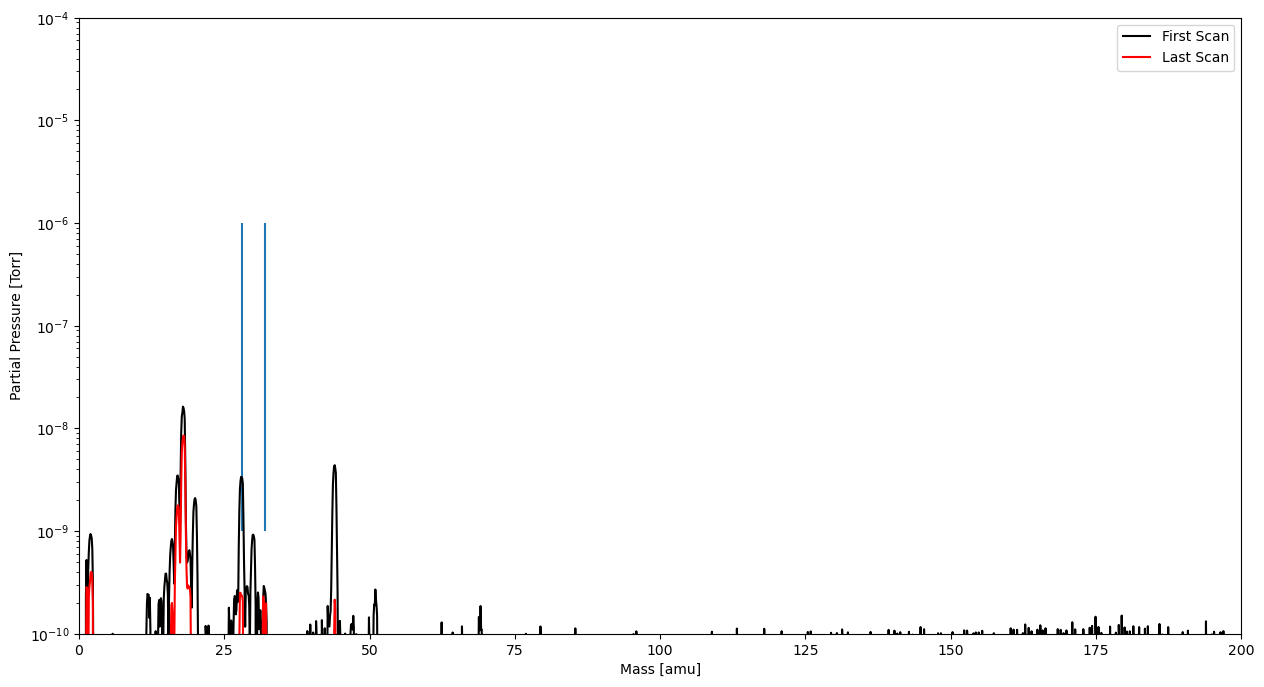

In [9]:
plt.figure(figsize=(15,8))
plt.xlabel('Mass [amu]')
plt.ylabel('Partial Pressure [Torr]')
plt.xlim(0,200)
plt.ylim(1e-10,1e-4)
total_p = []
for x in rga_scans: 
    total_p.append(np.sum(x))
    # plt.plot(amu, x, color='k', lw=1)
plt.plot(amu, rga_scans[0], color='k', alpha=1, label='First Scan')
plt.plot(amu, rga_scans[-1], color='r', alpha=1, label='Last Scan')
plt.legend(loc='upper right')
plt.vlines(x=28, ymin=1e-9, ymax=1e-6)
plt.vlines(x=32, ymin=1e-9, ymax=1e-6)

plt.yscale('log')
plt.show()

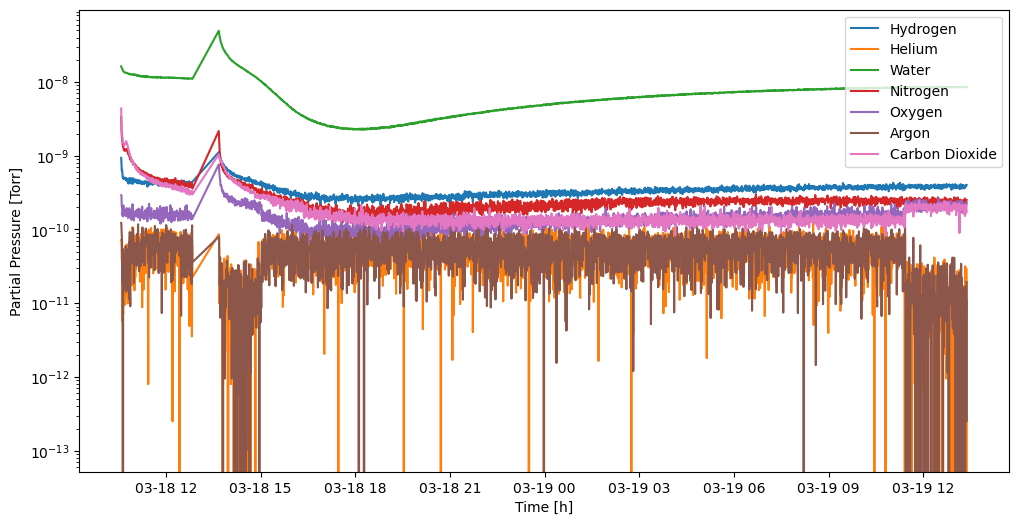

In [10]:
gases = [2,4,18,28,32,40,44]
labels = ['Hydrogen', 'Helium', 'Water','Nitrogen','Oxygen','Argon','Carbon Dioxide']

plt.figure(figsize=(12,6))
# plt.xlim(0,np.max(delta_t/3600.0))
# plt.ylim(5e-12,1e-7)
plt.xlabel('Time [h]')
# plt.xticks(fontsize=20)
plt.ylabel('Partial Pressure [Torr]')

for i,gas in enumerate(gases):
    cut = np.where((amu<gas+0.5) & (amu>gas-0.5))
    pp = [np.max(x[cut]) for x in rga_scans]
    plt.plot(delta_t, pp, label=labels[i])

# plt.fill_betweenx([10e-13, 10e-8], delta_t[0], datetime(2023, 12, 16, 16, 0, 0), color='gray', alpha=0.3)
# plt.text(datetime(2023, 12, 15, 20, 0, 0), 1e-11, u'T = 20 \N{DEGREE SIGN}C')
# plt.fill_betweenx([10e-13, 10e-8], datetime(2023, 12, 16, 16, 0, 0), delta_t[-1], color='#1f77b4', alpha=0.3)
# plt.text(datetime(2023, 12, 16, 17, 0, 0), 1e-11, u'T = -110 \N{DEGREE SIGN}C')
plt.legend(loc='upper right')
plt.yscale('log')
# plt.savefig('./TeflonRGAScanO2.png')
plt.show()


NameError: name 'rga_scans2' is not defined

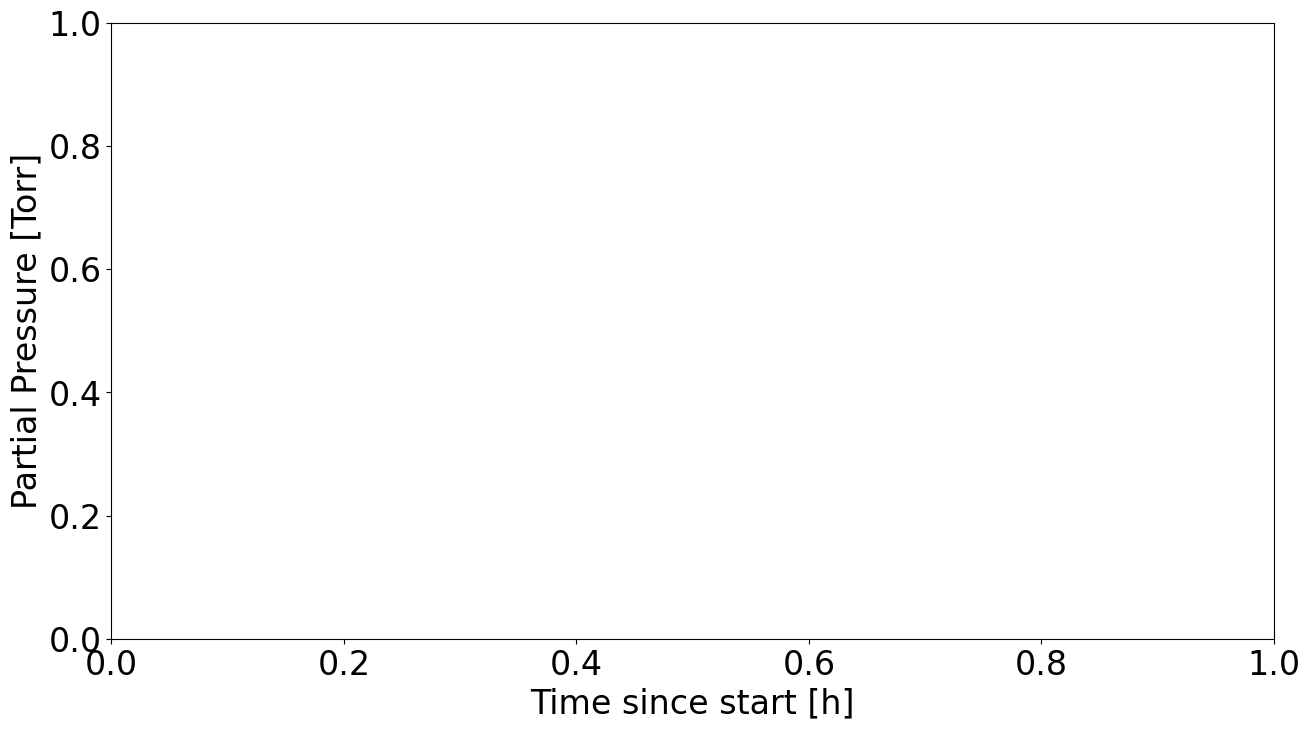

In [13]:
plt.figure(figsize=(15,8))
# plt.xlim(0,np.max(delta_t/3600.0))
# plt.ylim(1e-10,1e-4)
plt.xlabel('Time since start [h]')
plt.ylabel('Partial Pressure [Torr]')

for i,gas in enumerate(gases):
    cut = np.where((amu<gas+0.5) & (amu>gas-0.5))
    pp = [np.max(x[cut]) for x in rga_scans2]
    plt.plot(delta_t2, pp, label=labels[i])

plt.legend(loc='upper right')
plt.yscale('log')
plt.show()

## Plotting Temperature

In [11]:
import matplotlib.pyplot as plt
plt.style.use('../../style.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [12]:
import sys
sys.path.insert(0, '../../../purity-monitor/')
sys.path.insert(0, '../../WaveformAnalysis/')
import Dataset as Dataset
import StandMonitor as Monitor
import PlotFunctions as Plt

In [13]:
import importlib
importlib.reload(Dataset)
importlib.reload(Monitor)
importlib.reload(Plt)

<module 'PlotFunctions' from '../../WaveformAnalysis\\PlotFunctions.py'>

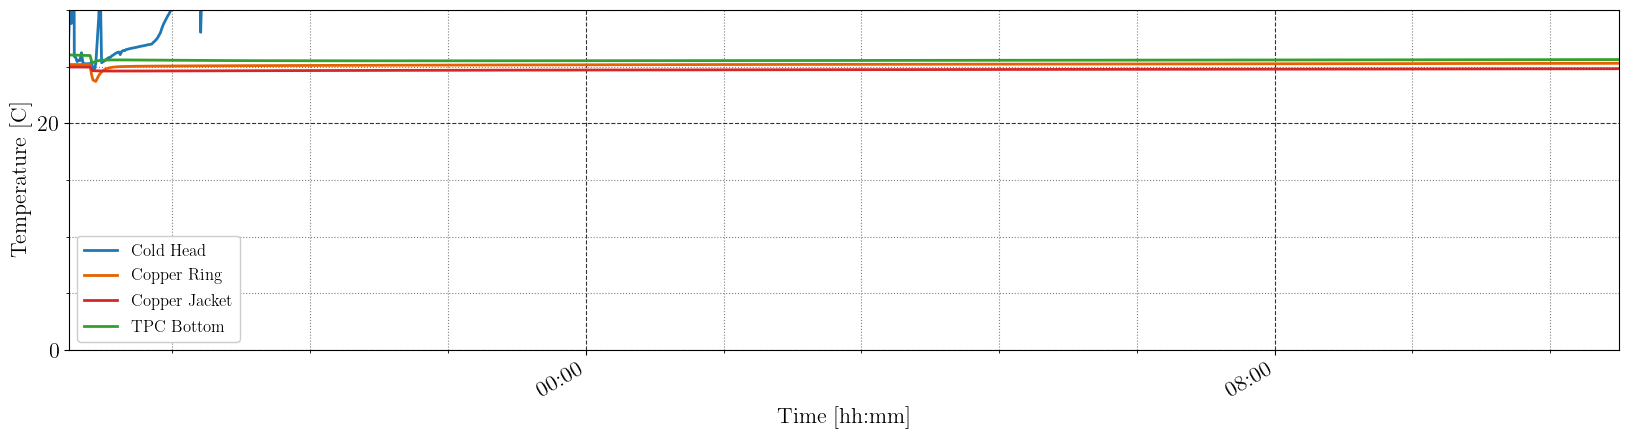

In [15]:
Sensors = []
Files = ['C:/Data/StandStatus/20231215.h5','C:/Data/StandStatus/20231216.h5' ]
# Files = ['C:/Data/StandStatus/20220117.h5']
for File in Files: 
    Sensor = Monitor.SensorData(Filepath=File)
    Sensor.GetData()
    Sensors.append(Sensor)

AllSensors = Monitor.SensorData()
AllSensors.Combine(Sensors)
XRange = [datetime(2023,12,15,18,0), dt.datetime(2023,12,16,12,0)]

AllSensors.PlotData(Data=AllSensors.Temp, Selection='Temperature', XTicks=480, YTicks=20, XRange=XRange, YRange=[0,30], Bin=120)
# AllSensors.PlotData(Data=AllSensors.SPressure, Selection='System Pressure', XTicks=480, YTicks=5, XRange=XRange, YRange=[-15,20], Bin=120)
# AllSensors.PlotData(Data=AllSensors.XPressure, Selection='Xenon Pressure', XTicks=240, YTicks=100, XRange=XRange, YRange=[0,850], Bin=120)